Compare common subpaths based on the hamming distance between pairwise alignments. 

Common subpath of a variation graph correspond to the string resulting from the concatenation of the (ordered) labels of the nodes that are used for all paths  

In [1]:
import sys
from pathlib import Path
# add parent folder to the path
module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt 
from utils.components import load_gfa
from GraphRicciCurvature.OllivierRicci import OllivierRicci
from GraphRicciCurvature.FormanRicci import FormanRicci

In [3]:
G=load_gfa(path_gfa="/data/pangeblocks-experiments/HLA-zoo-pangeblocks/output-HLA-zoo-mafft.op1.53-ep0/gfa-unchop/nodes/penalization0-min_len0/C-3107.gfa")
labels=pd.read_csv("/data/pangeblocks-experiments/HLA-zoo-pangeblocks/output-HLA-zoo-mafft.op1.53-ep0/gfa-unchop/nodes/penalization0-min_len0/C-3107.csv", sep=",")
G.nodes
list(G.to_undirected().neighbors("6"))

['5', '470', '208', '7', '241']

In [4]:
# Compute Distance between graphs: 
# 1. embed graph using Ricci Flow
orc = OllivierRicci(G.to_undirected(), alpha=0.5, method="OTD", verbose="INFO")
G_RC = orc.compute_ricci_curvature()

In [5]:

def show_results(G, curvature="ricciCurvature"):

    # Print the first five results
    # print("Karate Club Graph, first 5 edges: ")
    for n1,n2 in list(G.edges())[:5]:
        print("%s of edge (%s,%s) is %f" % (curvature,n1 ,n2, G[n1][n2][curvature]))

    # Plot the histogram of Ricci curvatures
    plt.subplot(2, 1, 1)
    ricci_curvtures = nx.get_edge_attributes(G, curvature).values()
    plt.hist(ricci_curvtures,bins=20)
    plt.xlabel('Ricci curvature')
    plt.title("Histogram of Ricci Curvatures")

    # Plot the histogram of edge weights
    plt.subplot(2, 1, 2)
    weights = nx.get_edge_attributes(G, "weight").values()
    plt.hist(weights,bins=20)
    plt.xlabel('Edge weight')
    plt.title("Histogram of Edge weights")

    plt.tight_layout()



In [6]:
from collections import namedtuple

def plot_ricci_curvature(G):
    info=namedtuple("Info", ["edge","len_metric","ricci_curvature"])
    data=[]
    for node1, adjnode1 in G_RC.adjacency():
        
        for node2, metric_ricci in adjnode1.items():
            len_metric, ricci_curv = metric_ricci["weight"], metric_ricci["ricciCurvature"]

            data.append( 
                info((node1,node2), len_metric, ricci_curv)
            )
    return pd.DataFrame(data).hist("ricci_curvature")

Ricci curvature of edge (1,201) is 0.000000
Ricci curvature of edge (1,409) is 0.000000
Ricci curvature of edge (2,163) is 0.000000
Ricci curvature of edge (2,201) is 0.000000
Ricci curvature of edge (3,158) is 0.000000


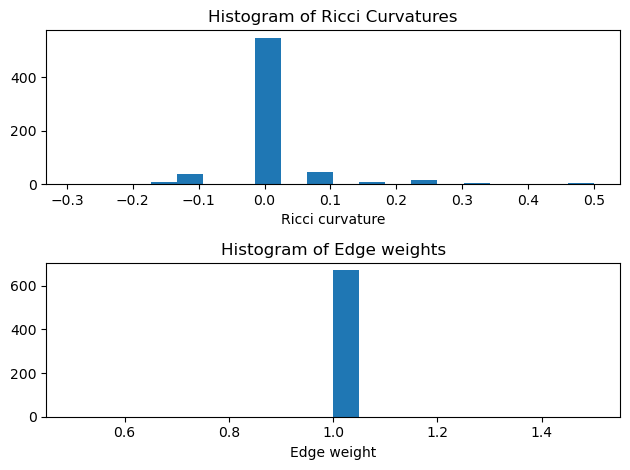

In [7]:
# plot_ricci_curvature(G_RC)
show_results(G_RC)



=====  Compute Ricci community - by Ricci flow =====
Ricci curvature of edge (1,201) is 0.111305
Ricci curvature of edge (1,409) is -0.129933
Ricci curvature of edge (2,163) is -0.025920
Ricci curvature of edge (2,201) is -0.025917
Ricci curvature of edge (3,158) is -0.129905


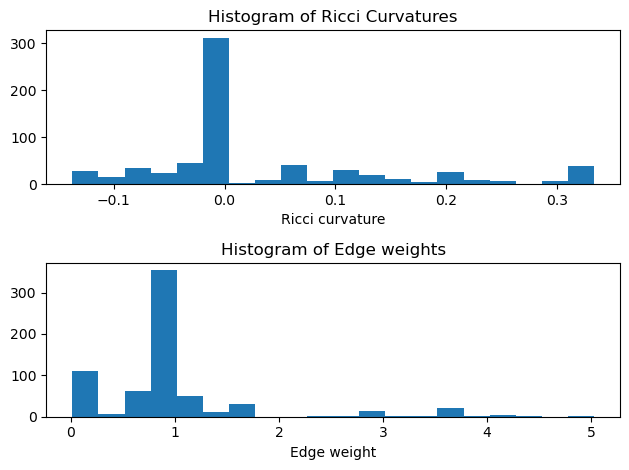

In [8]:
orc_OTD = OllivierRicci(G.to_undirected(), alpha=0.5, method="OTD", verbose="INFO", proc=16)
G_RF = orc_OTD.compute_ricci_flow(iterations=10)
print("\n=====  Compute Ricci community - by Ricci flow =====")
show_results(G_RF)
# clustering = orc_OTD.ricci_community()

In [9]:
frc = FormanRicci(G, verbose="TRACE")


Ricci curvature of edge (1,201) is -2.000000
Ricci curvature of edge (1,409) is -2.000000
Ricci curvature of edge (2,163) is -2.000000
Ricci curvature of edge (2,201) is -2.000000
Ricci curvature of edge (3,158) is -2.000000


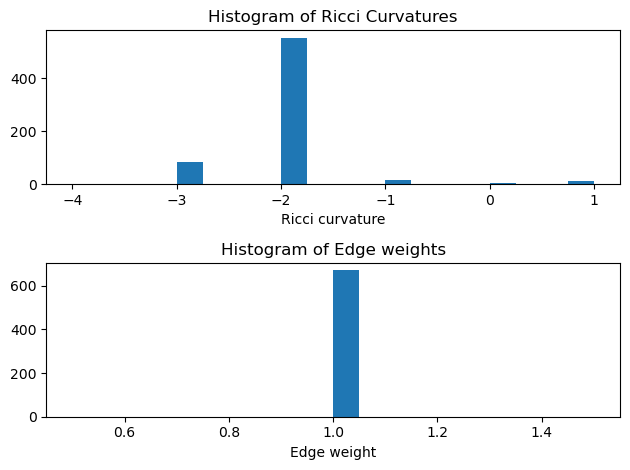

In [14]:
frc.compute_ricci_curvature()
G_frc = frc.G.copy()
show_results(G_frc, curvature="formanCurvature")

In [ ]:
# labels.to_csv("/data/pangeblocks-experiments/C-3107-bandage-labels-pangeblocks-nodes.csv", index=False)

In [ ]:
frc.compute_ricci_curvature()

TypeError: %d format: a real number is required, not str

In [ ]:
list(G.adjacency())

[('1', {'201': {}}),
 ('2', {'163': {}}),
 ('3', {'158': {}}),
 ('4', {'158': {}}),
 ('5', {'6': {}}),
 ('6', {'470': {}, '208': {}, '7': {}}),
 ('7', {'305': {}}),
 ('8', {'306': {}, '137': {}}),
 ('9', {'166': {}}),
 ('10', {'436': {}}),
 ('11', {'13': {}}),
 ('12', {'13': {}}),
 ('13', {'420': {}, '14': {}}),
 ('14', {'260': {}}),
 ('15', {'164': {}}),
 ('16', {'479': {}, '292': {}}),
 ('17', {'375': {}}),
 ('18', {'206': {}}),
 ('19', {'433': {}}),
 ('20', {'336': {}}),
 ('21', {'445': {}}),
 ('22', {'23': {}}),
 ('23', {'187': {}, '24': {}}),
 ('24', {'386': {}}),
 ('25', {'392': {}, '235': {}}),
 ('26', {'481': {}, '27': {}}),
 ('27', {'474': {}}),
 ('28', {'29': {}, '213': {}}),
 ('29', {'30': {}}),
 ('30', {'485': {}, '435': {}}),
 ('31', {'33': {}, '32': {}}),
 ('32', {'267': {}}),
 ('33', {'267': {}}),
 ('34', {'355': {}}),
 ('35', {'335': {}}),
 ('36', {'335': {}}),
 ('37', {'472': {}}),
 ('38', {'472': {}}),
 ('39', {'326': {}, '281': {}}),
 ('40', {'41': {}}),
 ('41', {'42